In [1]:
# do imports
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('agg')
%matplotlib inline
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# we will have digits 0-9 (so ten in total). Each image is 28x28x1 pixels
# The 1 is because this is black and white and the greyscale fully describes the pixel.
# In color, we have red, green, and blue values, so the 1 would be a 3
num_classes = 10
input_shape = (28, 28, 1)

# collect the data (automatically split into training and testing sets)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


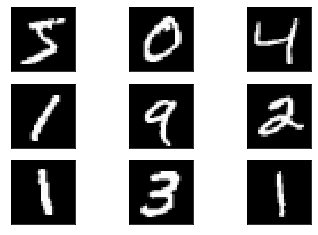

In [3]:
# plot some samples
for ii in range(9): 
    plt.subplot(330+1+ii)
    plt.imshow(x_train[ii, :, :, 0], cmap='gray')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [4]:
# do "one-hot" encoding on the target data
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# build and run the network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 22s 47ms/step - loss: 0.7376 - accuracy: 0.7683 - val_loss: 0.0800 - val_accuracy: 0.9785
Epoch 2/15
422/422 [==============================] - 11s 25ms/step - loss: 0.1194 - accuracy: 0.9630 - val_loss: 0.0597 - val_accuracy: 0.9820
Epoch 3/15
422/422 [==============================] - 10s 24ms/step - loss: 0.0898 - accuracy: 0.9728 - val_loss: 0.0454 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 10s 23ms/step - loss: 0.0693 - accuracy: 0.9789 - val_loss: 0.0414 - val_accuracy: 0.9877
Epoch 5/15
422/422 [==============================] - 10s 23ms/step - loss: 0.0624 - accuracy: 0.9810 - val_loss: 0.0378 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 10s 23ms/step - loss: 0.0581 - accuracy: 0.9814 - val_loss: 0.0335 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 10s 23ms/step - loss: 0.0506 - accuracy: 0.9833 - val_loss: 0.0353 - val_accuracy:

In [6]:
# Let's see how well we did
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02740747295320034
Test accuracy: 0.9904999732971191


In [15]:
y_hat = model.predict(x_test)
print(y_hat.shape)

(10000, 10)


In [26]:
# brute force rounding for easy comparison with the target
for ix in range(y_hat.shape[0]):
    for jj in range(y_hat.shape[1]):
        if y_hat[ix, jj] > 0.5:
            y_hat[ix, jj] = 1
        else:
            y_hat[ix, jj] = 0

# let's collect where we went wrong (with ~99% accuracy, there should be ~100 incorrect guesses)
err = []
for ix in range(y_hat.shape[0]):
    #print(y_hat[ix, :], '\t', y_test[ix, :])
    if y_hat[ix, :].dot(y_test[ix, :]) != 1:
        err.append(ix)

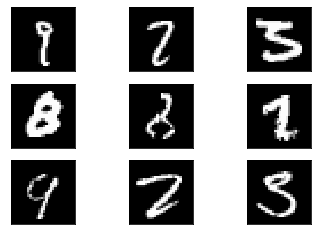

In [18]:
# plot some samples that were guessed incorrectly
for ii in range(9): 
    plt.subplot(330+1+ii)
    plt.imshow(x_test[err[ii], :, :, 0], cmap='gray')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [25]:
# see what we guessed and what the truth was
for ix in range(9):
    true = int(y_test[err[ix], :].dot(np.arange(10)))
    guess = int(y_hat[err[ix], :].dot(np.arange(10)))
    print('True: {0}\t Guess: {1}'.format(true, guess))

True: 9	 Guess: 8
True: 2	 Guess: 7
True: 3	 Guess: 5
True: 8	 Guess: 0
True: 8	 Guess: 2
True: 2	 Guess: 1
True: 9	 Guess: 7
True: 2	 Guess: 7
True: 3	 Guess: 5
